<a href="https://colab.research.google.com/github/yaser-omer/powerbi_project_analysing_attrition-rate/blob/main/Diwali_sales_python_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.shape

(11251, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [12]:
df.head(2)
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [15]:
pd.isnull(df).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [16]:
df.dropna(inplace=True)

In [18]:
df['Amount']=df['Amount'].astype('int')

In [19]:
df['Amount'].dtype

dtype('int64')

In [ ]:
df.columns

In [23]:
df[['Age','Orders' ,'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


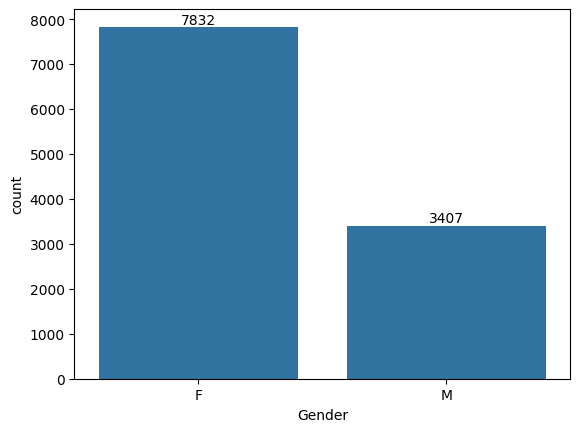

In [24]:
ax=sns.countplot(x='Gender',data=df)
for bars in ax.containers:
  ax.bar_label(bars)

In [30]:
df.groupby(['Gender'], as_index=False )['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<Axes: xlabel='Gender', ylabel='Amount'>

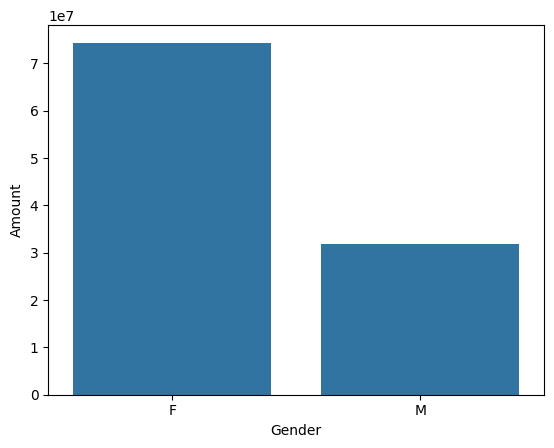

In [33]:
sales_gen=df.groupby(['Gender'], as_index=False )['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=sales_gen)

From above graph we can see that most of the buyers are females and even purchasing power of females is greater than men

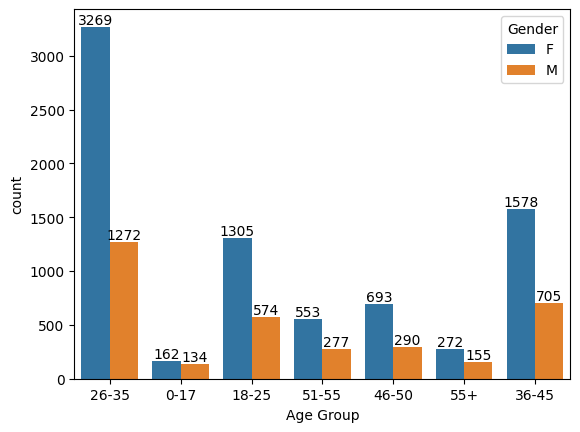

In [35]:
ax=sns.countplot(data=df,x='Age Group',hue='Gender')
for bars in ax.containers:
  ax.bar_label(bars)

From above graphs we can see that most of the buyers are of age group between 26-35 years females

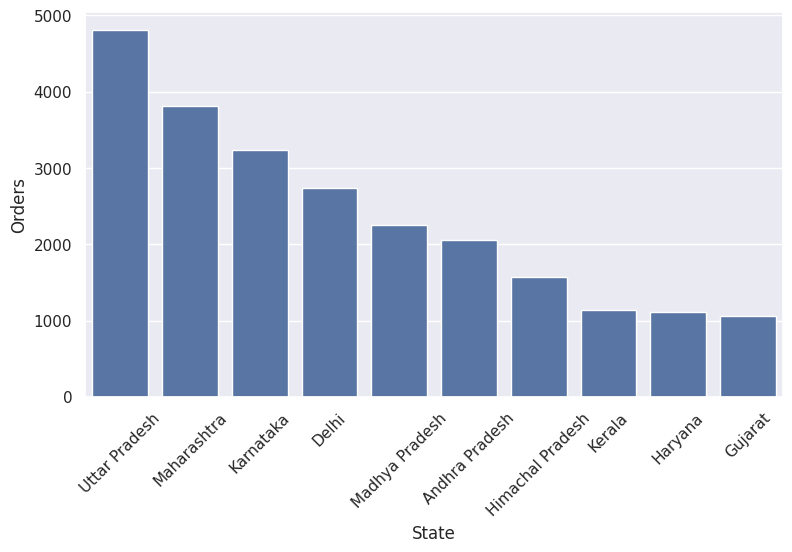

In [60]:
Sales_state=df.groupby(["State"], as_index=False)["Orders"].sum().sort_values(by="Orders",ascending=False).head(10)
sns.set(rc=({"figure.figsize":(9,5)}))
sns.barplot(data=Sales_state,x="State",y="Orders")
plt.xticks(rotation=45)
plt.show()

From above graph we can see most orders are from Uttar Pradesh followed by Maharashtra and karnataka

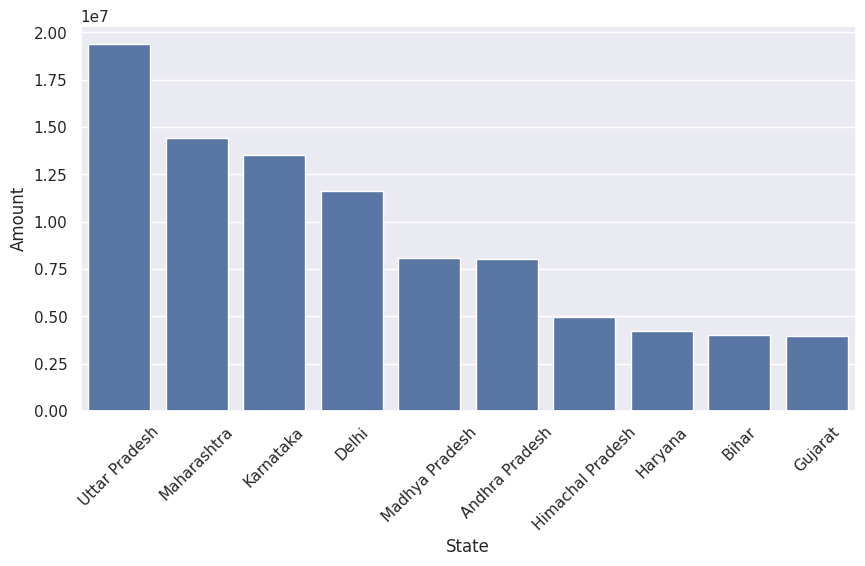

In [59]:
Sales_state=df.groupby(["State"], as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
sns.set(rc=({"figure.figsize":(10,5)}))
sns.barplot(data=Sales_state,x="State",y="Amount")
plt.xticks(rotation=45)
plt.show()

From above graph we can see most buyers are from Uttar Pradesh followed by Maharashtra and karnataka

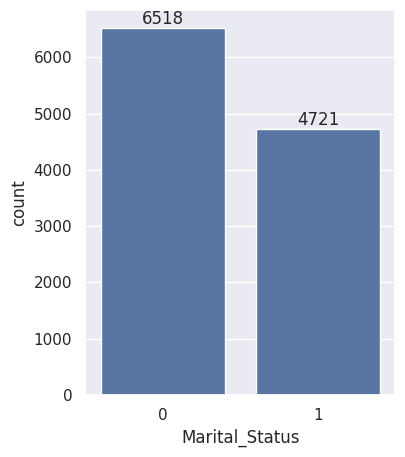

In [65]:
ax=sns.countplot(data=df,x='Marital_Status')
sns.set(rc=({"figure.figsize":(3,1)}))
for bars in ax.containers:
  ax.bar_label(bars)

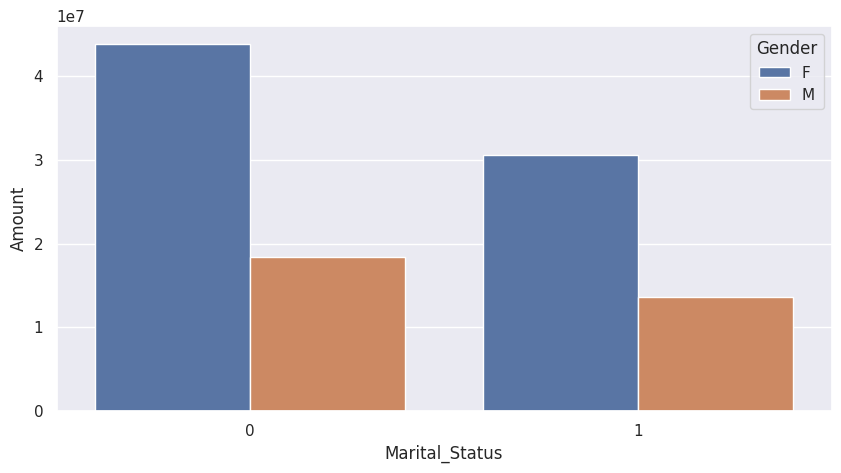

In [68]:
Sales_state=df.groupby(["Marital_Status","Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
sns.set(rc=({"figure.figsize":(10,5)}))
sns.barplot(data=Sales_state,x="Marital_Status",y="Amount",hue="Gender")
plt.xticks(rotation=0)
plt.show()

From above graph we can see that most of the buyers are married(women) and they have high purchasing power

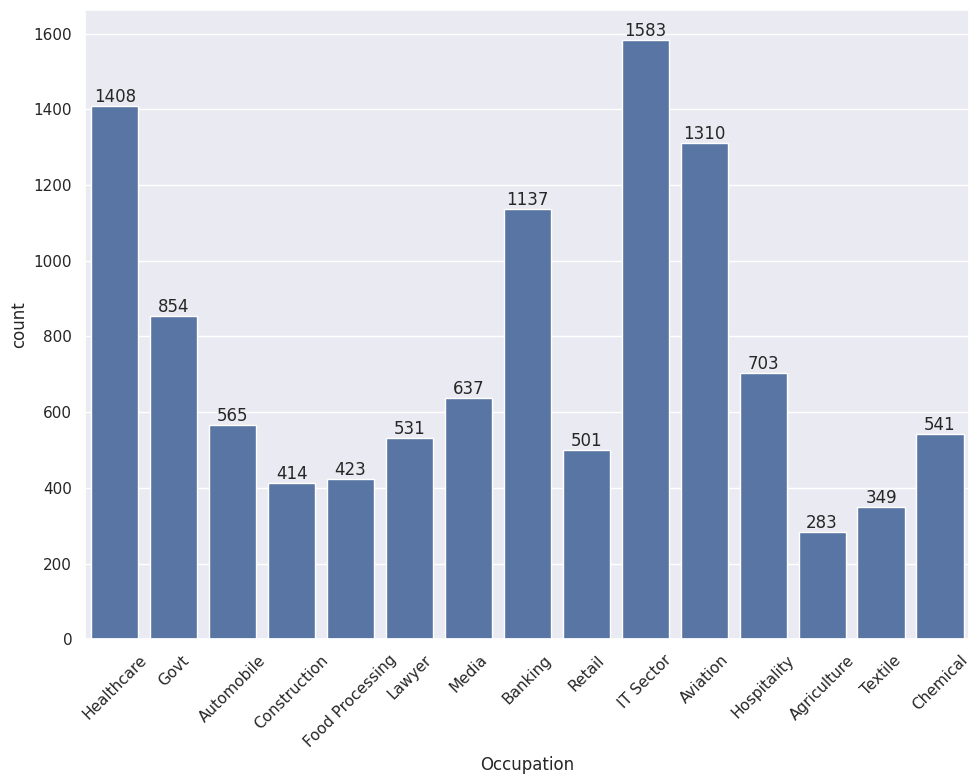

In [73]:
sns.set(rc=({"figure.figsize":(10,8)}))
ax=sns.countplot(data=df,x='Occupation')
for bars in ax.containers:
  ax.bar_label(bars)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From above graphs we can see most of the buyers are from IT sector,Aviation,Healthcare

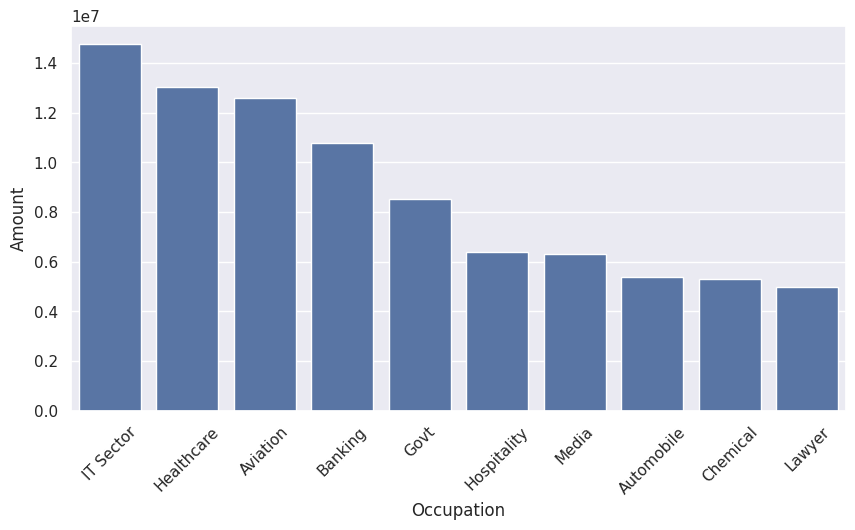

In [76]:
Sales_state=df.groupby(["Occupation"], as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)
sns.set(rc=({"figure.figsize":(10,5)}))
sns.barplot(data=Sales_state,x="Occupation",y="Amount")
plt.xticks(rotation=45)
plt.show()

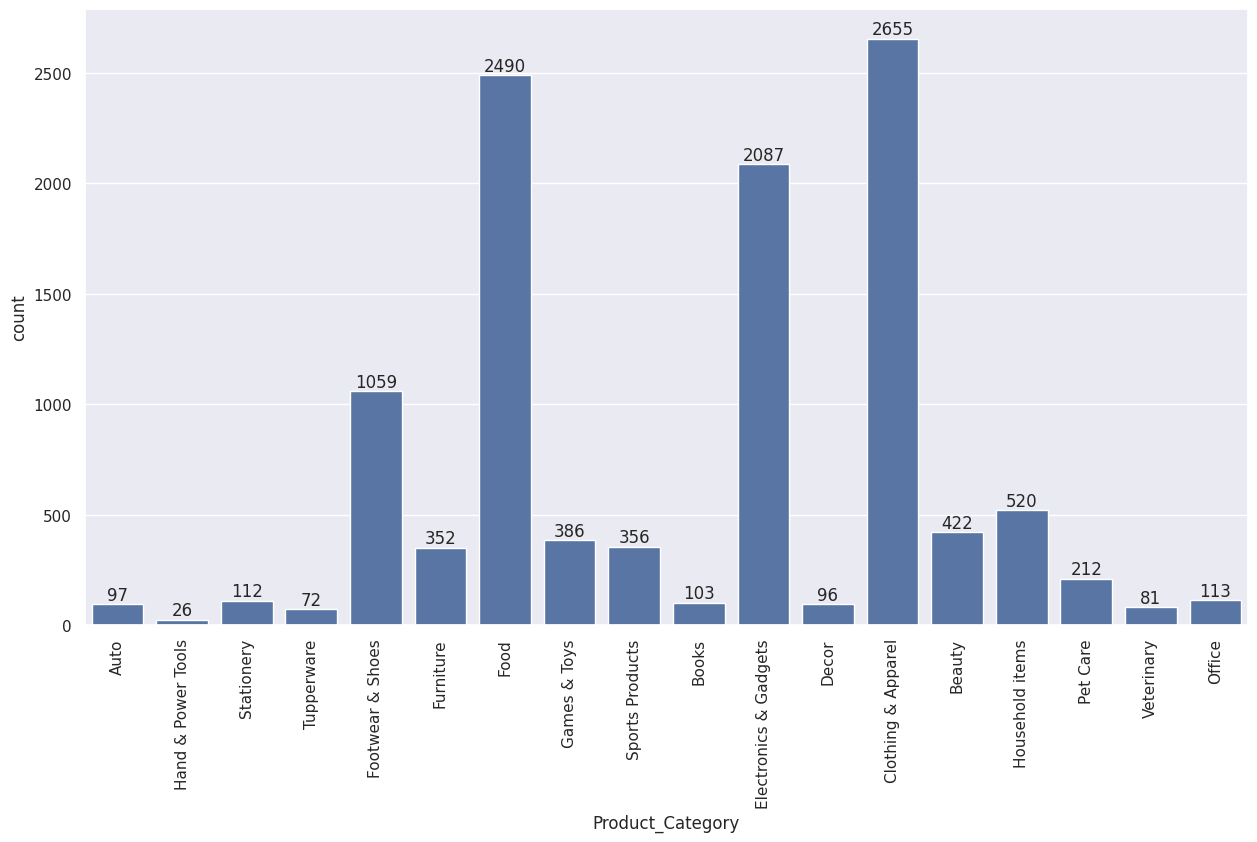

In [81]:
sns.set(rc=({"figure.figsize":(15,8)}))
ax=sns.countplot(data=df,x='Product_Category')
for bars in ax.containers:
  ax.bar_label(bars)
plt.xticks(rotation=90)

plt.show()


From the above graph we can see that most of sold products from food,clothing, Footwear